# Dopl≈àovaƒçka - P≈ô√≠klad zpracov√°n√≠ sktrukturovan√Ωch dat v Kerasu 
https://keras.io/examples/structured_data/structured_data_classification_from_scratch/

Dopl≈àovac√≠ verze p≈ô√≠kladu zpracov√°n√≠ strukturovan√Ωch dat v Kerasu. Tato verze vy≈æaduje doplnƒõn√≠ k√≥du na m√≠stech oznaƒçen√Ωch `TODO`.
Spr√°vn√© ≈ôe≈°en√≠ najdete v souboru `intro.ipynb`.


Co se nauƒç√≠me:
* Co jsou strukturovan√° data a jak je lze ulo≈æit.
* Jak p≈ôem√Ω≈°let o z√°vislostech ve strukturovan√Ωch datech a jejich modelov√°n√≠.
* Nejz√°kladnƒõj≈°√≠ z√°klad Kerasu:
    * vytvo≈ôen√≠ datasetu,
    * p≈ô√≠prava strukturovan√Ωch dat pro tr√©nov√°n√≠,
    * vytvo≈ôen√≠ a natr√©nov√°n√≠ modelu,
    * inference. 

#### Zaƒçneme importem pot≈ôebn√Ωch knihoven

In [ ]:
random_seed=42000 # nastaven√≠ n√°hodn√©ho seedu pro opakovatelnost v√Ωsledk≈Ø
%matplotlib widget 
import ipywidgets
import ipympl
import prettytable as pt # knihovna pro v√Ωpis tabulek
import matplotlib.pyplot as plt # knihovna pro vykreslov√°n√≠ graf≈Ø
# nastaven√≠ parametr≈Ø pro vykreslov√°n√≠
colorbins = 100 # number of bins for plotting
cmap = 'jet' # color map for plotting

import numpy as np # matematick√° knihovna pro multidimenzion√°ln√≠ v√Ωpoƒçty
import pandas as pd # knihovna pro pr√°ci s daty

import tensorflow as tf # knihovna pro strojov√© uƒçen√≠
from tensorflow.keras import layers # vrstvy pro sestaven√≠ modelu
import keras # vysoko√∫rov≈àov√© API pro sestaven√≠ a tr√©nov√°n√≠ model≈Ø hlubok√©ho uƒçen√≠

######################################################################################
#TODO: vypi≈°te verze naƒçten√Ωch knihoven 




######################################################################################

Version of tensorflow: 2.13.0
Version of keras: 2.13.1
Version of numpy: 1.24.3
Version of pandas: 2.0.3
Version of ipywidgets: 7.7.2
Version of ipympl: 0.9.1


### Co jsou strukturovan√° data?

#### St√°hneme si ve≈ôejnƒõ dostupn√Ω dataset onemocnƒõn√≠ srdce::
Spracujeme data pomoc√≠ pandas.DataFrame - dokumentace zde: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [2]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
dataframe = pd.read_csv(file_url)

# Jak jsou data ulo≈æena?
##########################################################################################
# TODO: Vypi≈°te prvn√≠ch 5 ≈ô√°dk≈Ø na≈°eho dataframu s pou≈æit√≠m metody pandas.DataFrame.head()

######################################################################################

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0

#### co to znamen√°?
Dek√≥dujme si numerick√© hodnoty a vytisknƒõme data pro nƒõkter√© pacienty...

In [3]:
# Tyto hodnoty zn√°me z dokumentace k datasetu https://archive.ics.uci.edu/ml/datasets/heart+Disease
pain_types = ['unknown', 'typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
sexes = ['Female', 'Male']
YesNo = ['No', 'Yes']
electrocardiographic_results = ['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy']
slopes = ['unknown', 'upsloping', 'flat', 'downsloping']

# Metoda pro pƒõknƒõj≈°√≠ vyti≈°tƒõn√≠ na≈°ich dat
def print_data(dataframe, patient_index):

    datarow = dataframe.iloc[patient_index]

    # poskl√°d√°me si tabulku
    table = pt.PrettyTable()
    table.field_names = ["Shortcut", "Description", "Value for patient number " + str(patient_index)  ]
    table.add_row(["age", "age in years", datarow[0]])
    table.add_row(["sex", "biological sex", sexes[datarow[1]]])
    table.add_row(["cp", "Chest pain type (0, 1, 2, 3, 4)", pain_types[datarow[2]]])
    table.add_row(["trestbps", "Resting blood pressure (in mm Hg on admission)", datarow[3]])
    table.add_row(["chol", "Cholesterol in mg/dl", datarow[4]])
    table.add_row(["fbs", "Fasting blood sugar in 120 mg/dl", YesNo[datarow[5]]])
    table.add_row(["restecg", "Resting electrocardiographic results", electrocardiographic_results[datarow[6]]])
    table.add_row(["thalach", "Maximum heart rate achieved", datarow[7]])
    table.add_row(["exang", "Exercise induced angina", YesNo[datarow[8]]])
    table.add_row(["oldpeak", "ST depression induced by exercise relative to rest", datarow[9]])
    table.add_row(["slope", "Peak exercise ST segment", slopes[datarow[10]]])
    table.add_row(["ca", "Number of major vessels (0-3) colored by fluoroscopy", datarow[11]])
    table.add_row(["thal", "Thal (3 = normal; 6 = fixed defect; 7 = reversible defect)", datarow[12]])
    table.add_row(["target", "Diagnosis of heart disease", datarow[13]])

    
    # vyti≈°tƒõn√≠ tabulky
    print(table)


##########################################################################################
# TODO: Pou≈æijte nachystanou metodu print_data a vypi≈°te data pro prvn√≠ch 5 pacient≈Ø

##########################################################################################


+----------+------------------------------------------------------------+------------------------------+
| Shortcut |                        Description                         |  Value for patient number 0  |
+----------+------------------------------------------------------------+------------------------------+
|   age    |                        age in years                        |              63              |
|   sex    |                       biological sex                       |             Male             |
|    cp    |              Chest pain type (0, 1, 2, 3, 4)               |        typical angina        |
| trestbps |       Resting blood pressure (in mm Hg on admission)       |             145              |
|   chol   |                    Cholesterol in mg/dl                    |             233              |
|   fbs    |              Fasting blood sugar in 120 mg/dl              |             Yes              |
| restecg  |            Resting electrocardiographic re

### Intuice za modely

#### Proƒç tomu ≈ô√≠k√°me "model"? Co je to "model" obecnƒõ? Jak√© jsou nƒõjak√© p≈ô√≠klady model≈Ø?
Inspirace: https://en.wikipedia.org/wiki/Model_(disambiguation)

Pod√≠vejme se na jednu z promƒõnn√Ωch - vƒõk. M≈Ø≈æeme p≈ôedpovƒõdƒõt srdeƒçn√≠ chorobu jen z vƒõku?



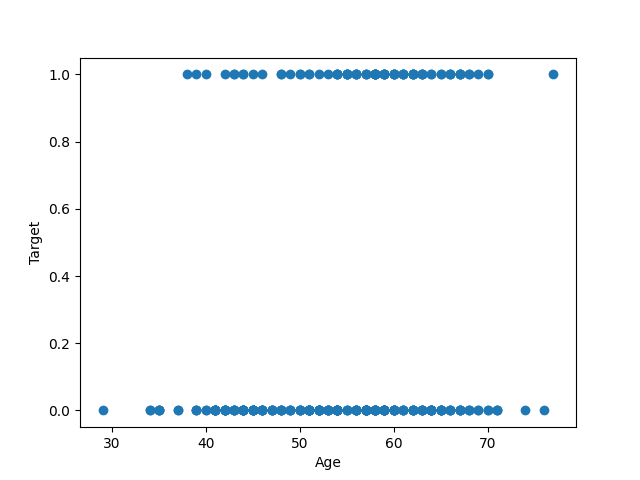

In [4]:
# vyzobneme z datasetu pouze promƒõnn√© vƒõk, typ bolesti a pravdƒõpodobnost v√Ωskytu srdeƒçn√≠ho onemocnƒõn√≠ (target)
tmp = dataframe.copy()

##########################################################################################
# TODO: pou≈æijte metodu pop() na vyjmut√≠ po≈æadovan√Ωch dat

labels_orig =       # TODO: pravdƒõpodobnost v√Ωskytu srdeƒçn√≠ho onemocnƒõn√≠
ages_orig =         # TODO: vƒõk
cp_orig =           # TODO: typ bolesti
##########################################################################################

# Vykresl√≠me si graf z√°vislosti onemocnƒõn√≠ na vƒõku, kde na ose x bude vƒõk a na ose y pravdƒõpodobnost v√Ωskytu srdeƒçn√≠ho onemocnƒõn√≠
fig = plt.figure()
plt.scatter(ages_orig, labels_orig)
plt.xlabel("Age")
plt.ylabel("Target")
plt.show()


#### To n√°m moc nepomohlo... co kdy≈æ p≈ôid√°me promƒõnnou typu bolesti?

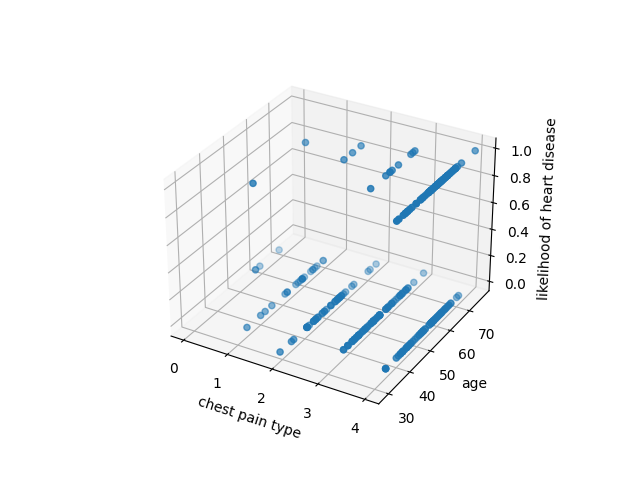

In [5]:
# Prid√°me dal≈°√≠ promƒõnnou a zobraz√≠me si 3d graf
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(cp_orig, ages_orig, labels_orig)

# osy x a y jsou promƒõnn√©, kter√© m√°me k dispozici
ax.set_xlabel('chest pain type')
ax.set_ylabel('age')

# osa z je promƒõnn√°, kterou chceme predikovat
ax.set_zlabel('likelihood of heart disease')

plt.show()


### Zkusme odhadnout model pravdepodobnosti vzniku srdecni choroby jen z dostupnych dat

Zinterpolujeme data pro odhad chybƒõj√≠c√≠ch hodnot - vysvƒõtlen√≠ interpolace zde: https://en.wikipedia.org/wiki/Multivariate_interpolation

Using 242 samples for training and 61 for validation from the dataset of 303 samples in total


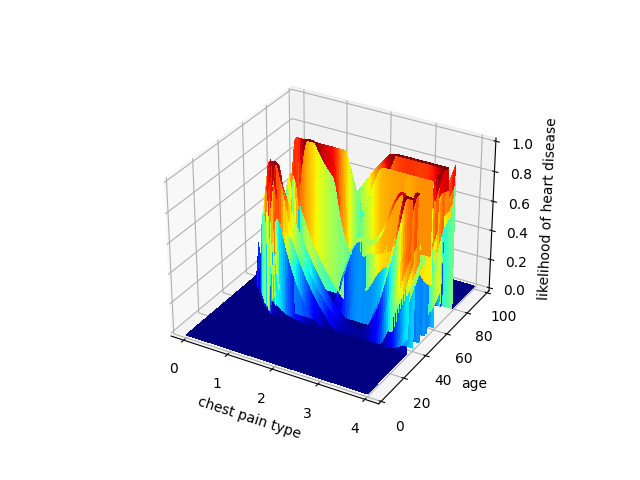

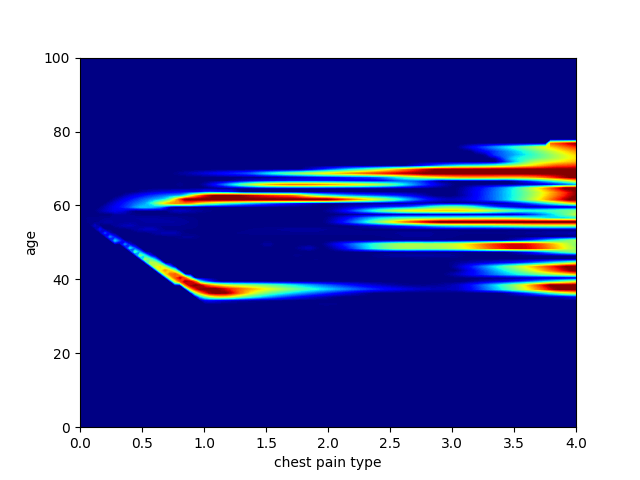

In [6]:
# Vezmeme si z datasetu jenom sloupce, kter√© n√°s zaj√≠maj√≠
smol = dataframe.copy()
smol = smol[["cp", "age", "target"]]

##########################################################################################
# n√°hodnƒõ si rozdƒõl√≠me data na tr√©novac√≠ a validaƒçn√≠ mno≈æinu v pomƒõru 80:20
# TODO: Vytvo≈ôte validaƒçn√≠ mno≈æinu, kter√° bude m√≠t 20% dat z cel√©ho datasetu.
#       Pou≈æijte random_state=random_seed, abyste mƒõli stejn√° data jako my.

val_smol = # Pou≈æijte metodu sample() dataframu smol
##########################################################################################

# tr√©novac√≠ mno≈æina bude m√≠t v≈°echna data, kter√° nejsou v validaƒçn√≠ mno≈æinƒõ
train_smol = smol.drop(val_smol.index)

# local copy of the data
val_smol_copy = val_smol.copy()
train_smol_copy = train_smol.copy()

print(
    "Using %d samples for training and %d for validation from the dataset of %d samples in total"
    % (len(train_smol), len(val_smol), len(dataframe))
)

# get the labels from the training and validation data
train_labels_smol = train_smol_copy.pop("target")
val_labels_smol = val_smol_copy.pop("target")

train_age_smol = train_smol_copy.pop("age")
val_age_smol = val_smol_copy.pop("age")

train_cp_smol = train_smol_copy.pop("cp")
val_cp_smol = val_smol_copy.pop("cp")


# interpolujeme data pomoc√≠ scipy ------------------------------------------------------------------------------
from scipy.interpolate import griddata
import numpy as np

# vytvo≈ô√≠me si sadu vstupn√≠ch hodnot, pro kter√© chceme z√≠skat interpolovan√© hodnoty
grid_x_naive, grid_y_naive = np.mgrid[0:4:100j, 0:100:100j]

# interpolujeme data
grid_z_naive = griddata((train_cp_smol, train_age_smol), train_labels_smol, (grid_x_naive, grid_y_naive), method='cubic', fill_value=0)

# o≈ô√≠zneme hodnoty, kter√© jsou mimo rozsah 0-1 (slu≈°n√° pravdƒõpodobnost by mƒõla b√Ωt v tomto rozsahu)
grid_z_naive = np.clip(grid_z_naive, 0, 1)

# zobraz√≠me si interpolovan√° data ---------------------------------------------------------------------------
fig = plt.figure()
ax_naive = fig.add_subplot(projection='3d')

ax_naive.plot_surface(grid_x_naive, grid_y_naive, grid_z_naive,cmap=cmap,rstride=1, cstride=1, 
                       linewidth=0, antialiased=False, shade=False)

ax_naive.set_xlabel('chest pain type')
ax_naive.set_ylabel('age')
ax_naive.set_zlabel('likelihood of heart disease')

ax_naive.set_zlim(0, 1)
ax_naive.set_ylim(0, 100)

plt.show()

fig = plt.figure()

ax2d_naive = fig.add_subplot()
ax2d_naive.contourf(grid_x_naive, grid_y_naive, grid_z_naive, colorbins,cmap=cmap)
ax2d_naive.set_xlabel('chest pain type')
ax2d_naive.set_ylabel('age')

ax2d_naive.set_ylim(0, 100)

plt.show()



#### Je pravdƒõpodobn√©, ≈æe v 50 letech pravdƒõpodobnost n√°hle klesne a pak se znovu zv√Ω≈°√≠?

Co kdy≈æ data vyhlad√≠me? To m≈Ø≈æeme t≈ôeba Gaussov√Ωm filtrem: https://en.wikipedia.org/wiki/Gaussian_filter

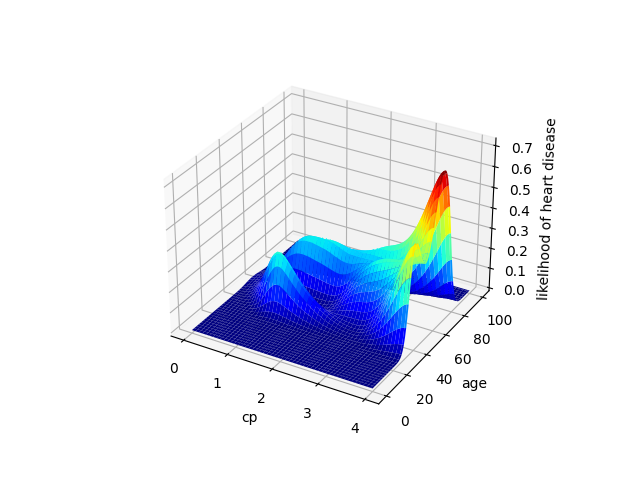

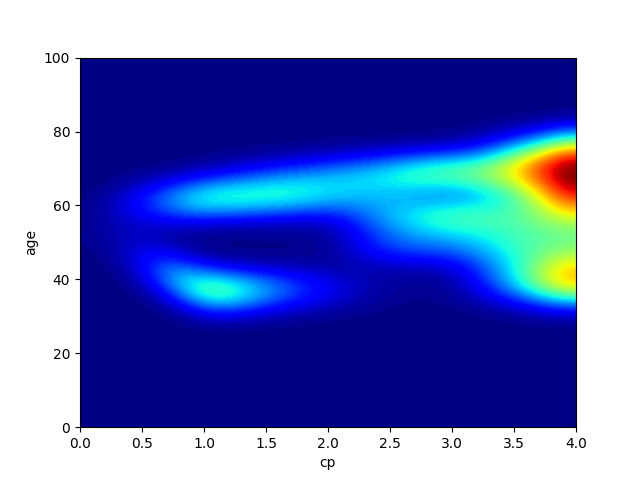

In [7]:

###############################################################################################
# TODO: P≈ôefiltrujte data v grid_z_naive pomoc√≠ funkce gaussian_filter z knihovny scipy.ndimage.
#       Pou≈æijte sigma=4. Hint: metodu je pot≈ôeba importovat.

grid_z_naive_smooth = # filtrace dat pomoc√≠ gaussian_filter
###############################################################################################


# o≈ô√≠zneme data, aby se ve≈°la do rozsahu 0 a≈æ 1
grid_z_naive_smooth = np.clip(grid_z_naive_smooth, 0, 1)

# vykresl√≠me jako 3D graf
fig = plt.figure()
ax_naive_smooth = fig.add_subplot(projection='3d')

ax_naive_smooth.plot_surface(grid_x_naive, grid_y_naive, grid_z_naive_smooth, cmap=cmap)

ax_naive_smooth.set_xlabel('cp')
ax_naive_smooth.set_ylabel('age')
ax_naive_smooth.set_zlabel('likelihood of heart disease')

plt.show()

fig = plt.figure()

ax2d_naive_smooth = fig.add_subplot()
ax2d_naive_smooth.contourf(grid_x_naive, grid_y_naive, grid_z_naive_smooth,colorbins, cmap=cmap)
ax2d_naive_smooth.set_xlabel('cp')
ax2d_naive_smooth.set_ylabel('age')

ax2d_naive_smooth.set_ylim(0, 100)

plt.show()

#### Teƒè m√°me model, kter√Ω n√°m ≈ô√≠k√°, ≈æe star≈°√≠ lid√© s bolest√≠ na hrudi maj√≠ nejvƒõt≈°√≠ pravdƒõpodobnost m√≠t srdeƒçn√≠ chorobu üëçüëçüëç.

(Mimochodem pravdƒõpodobnost se z√°zraƒçnƒõ sni≈æuje po 70 letech... )

Jak√° je p≈ôesnost na≈°eho modelu? Metrika p≈ôesnosti: https://keras.io/api/metrics/accuracy_metrics/

In [8]:

def evaluate_predictions(labels, predictions):
    '''
    Funkce pro vyhodnocen√≠ predikc√≠. Vrac√≠ accuracy a pr√°h, p≈ôi kter√©m byla dosa≈æena nejvy≈°≈°√≠ accuracy.
    (Pr√°h znamen√°, ≈æe pokud je predikce vy≈°≈°√≠ ne≈æ pr√°h, tak se predikuje t≈ô√≠da 1, jinak 0.)
    '''
    best_threshold = 0
    best_accuracy = 0
    for threshold in np.arange(0, 1, 0.01):
        metric = tf.keras.metrics.Accuracy()
        metric.update_state(labels, np.array(predictions) > threshold)
        accuracy = metric.result().numpy()
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    return best_accuracy, best_threshold

# Spoƒç√≠t√°me predikce na validaƒçn√≠ch datech
predictions = []
for i in range(len(val_cp_smol.values)):

    # najdeme nejbli≈æ≈°√≠ index v m≈ô√≠≈æce pro dan√Ω sample (n√°≈° model p≈ôedpov√≠d√° jen na m≈ô√≠≈æce)
    x_index = np.argmin(np.abs(grid_x_naive[:, 0] - val_cp_smol.values[i]))
    
    # to stejn√© pro promƒõnnou y
    y_index = np.argmin(np.abs(grid_y_naive[0, :] - val_age_smol.values[i]))

    # jak√° je hodnota modelu na dan√Ωch indexech?
    predictions.append(grid_z_naive_smooth[x_index, y_index])

###############################################################################################
# TODO: ulo≈æte do promƒõnn√© metric t≈ô√≠du pro accuracy metriku z kerasu

metric = # t≈ô√≠da pro accuracy metriku z kerasu
###############################################################################################

metric.update_state(val_labels_smol, np.array(predictions) > 0.5)

print("Naive model accuracy with threshold 0.5: {:.2f}%".format(metric.result().numpy() * 100))

best_accuracy, best_threshold = evaluate_predictions(val_labels_smol, predictions)

print("Naive model best accuracy: {:.2f}% at threshold {:.2f}".format(best_accuracy * 100, best_threshold))


Naive model accuracy with threshold 0.5: 68.85%
Naive model best accuracy: 78.69% at threshold 0.31


#### Zn√≠ to dost dob≈ôe? Co jsme to vlastnƒõ vytvo≈ôili za model? Pod√≠vejme se, jak vypad√° funkce vyprahovan√° nejlep≈°√≠ hodnotou prahu...

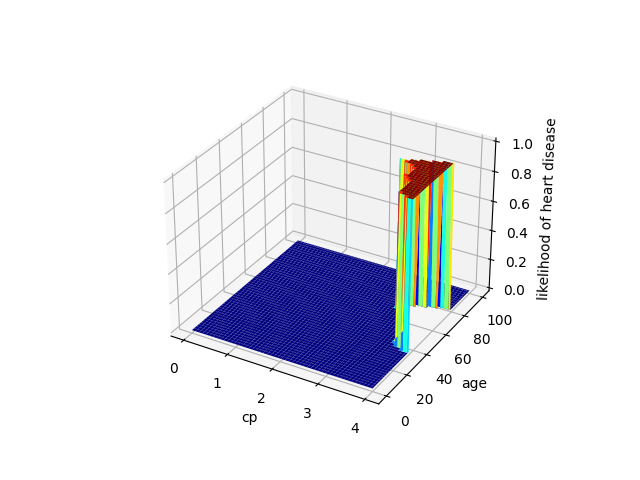

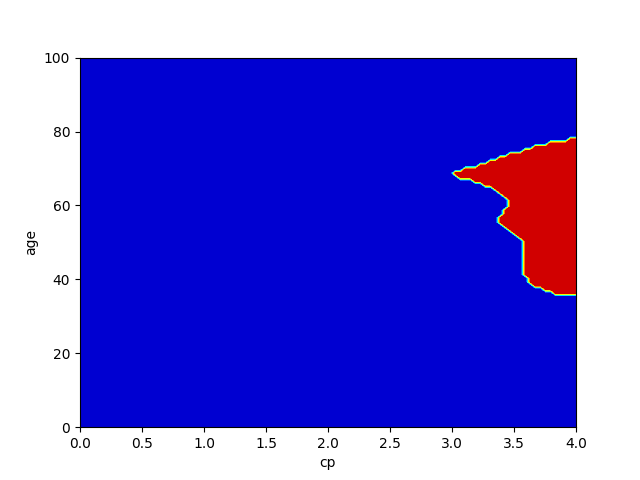

In [9]:
fig = plt.figure()
ax_naive_smooth = fig.add_subplot(projection='3d')

###############################################################################################
# TODO: vyprahujte interpolovan√° a vyhlazen√° data grid_z_naive_smooth
#       vyprahov√°n√≠ spoƒç√≠t√°me nastaven√≠ v≈°ech hodnot v grid_z_naive_smooth, kter√© jsou vƒõt≈°√≠ ne≈æ 
#       best_threshold na "1"

grid_z_naive_smooth_thresholded = # prahov√°n√≠
###############################################################################################

ax_naive_smooth.plot_surface(grid_x_naive, grid_y_naive, grid_z_naive_smooth_thresholded, cmap=cmap)

ax_naive_smooth.set_xlabel('cp')
ax_naive_smooth.set_ylabel('age')
ax_naive_smooth.set_zlabel('likelihood of heart disease')

plt.show()

fig = plt.figure()

ax2d_naive_smooth = fig.add_subplot()
ax2d_naive_smooth.contourf(grid_x_naive, grid_y_naive, grid_z_naive_smooth_thresholded, cmap=cmap)
ax2d_naive_smooth.set_xlabel('cp')
ax2d_naive_smooth.set_ylabel('age')

ax2d_naive_smooth.set_ylim(0, 100)

plt.show()

### Vyzkou≈°√≠me natr√©novat neuronovou s√≠≈• na na≈°√≠ datov√© podmno≈æinƒõ

#### Vytvo≈ôen√≠ datasetu pro tr√©nov√°n√≠
Pou≈æijeme t≈ô√≠du tf.data.Dataset - https://www.tensorflow.org/api_docs/python/tf/data/Dataset

Na≈°e data jsou teƒè datov√©ho typu Tensor - https://www.tensorflow.org/api_docs/python/tf/Tensor

In [10]:
def dataframe_to_dataset(dataframe):
    '''
    Funkce pro p≈ôevod pandas dataframe do tensorflow datasetu.
    '''

    # lok√°ln√≠ kopie dat
    dataframe = dataframe.copy()

    # vyjmeme c√≠lov√Ω sloupec z dat, to je sloupec, kter√Ω chceme predikovat - progn√≥za srdeƒçn√≠ choroby
    labels = dataframe.pop("target")

    # vytvo≈ô√≠me dvojice (vstupn√≠ data, c√≠lov√° hodnota)
    new_data_format = (dict(dataframe), labels)

    # vytvo≈ô√≠me tensorflow dataset
    ds = tf.data.Dataset.from_tensor_slices(new_data_format)

    ###################################################################################################
    # TODO: Zam√≠chejte data v datasetu pomoc√≠ metody shuffle(). buffer_size nastavte na d√©lku datasetu.
    #       Hint: pro zji≈°tƒõn√≠ d√©lky datasetu m√° python built-in funkci, kterou m≈Ø≈æete pou≈æ√≠t.

    ds = # shuffle dataset
    ###################################################################################################


    return ds


# vytvo≈ô√≠me dva datasety, jeden pro tr√©nov√°n√≠ a druh√Ω pro validaci
train_ds = dataframe_to_dataset(train_smol)
val_ds = dataframe_to_dataset(val_smol)


# zobraz√≠me si p√°r prvk≈Ø z tr√©novac√≠ho datasetu
for x, y in train_ds.take(5):
    print("Input (tensor with our structured data):", x)
    print("Target (tensor with value 0 or 1):", y)



Input (tensor with our structured data): {'cp': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=57>}
Target (tensor with value 0 or 1): tf.Tensor(0, shape=(), dtype=int64)
Input (tensor with our structured data): {'cp': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=41>}
Target (tensor with value 0 or 1): tf.Tensor(0, shape=(), dtype=int64)
Input (tensor with our structured data): {'cp': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=52>}
Target (tensor with value 0 or 1): tf.Tensor(0, shape=(), dtype=int64)
Input (tensor with our structured data): {'cp': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=60>}
Target (tensor with value 0 or 1): tf.Tensor(0, shape=(), dtype=int64)
Input (tensor with our structured data): {'cp': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'age': <tf.Tensor: shape=(), dtype=int6

#### Vytvo≈ô√≠me d√°vky (batches) dat pro tr√©nov√°n√≠

We well use batches if data to train and evaluate the model. Notice, what happens now when we call "take" on the dataset.
Model se tr√©nuje po mal√Ωch podmno≈æin√°ch dat, kter√© se naz√Ωvaj√≠ d√°vky (batches). D√°vku si z datasetu m≈Ø≈æeme vybrat pomoc√≠ metody "take". V≈°imnƒõte si, co se stane, kdy≈æ zavol√°me "take" na datasetu.

In [11]:
# kolik vzork≈Ø je v batchi
batch_size = 32

###################################################################################################
# TODO: nabatchujte data pomoc√≠ metody batch() 

train_ds = # batchujte train_ds
val_ds = # batchujte val_ds
###################################################################################################

# pozor - toto se rozbije, pokud se spust√≠ v√≠cekr√°t - spus≈•te p≈ôedchoz√≠ bu≈àku pro reset datasetu
print("The first batch of the training dataset:")
for input, label in train_ds.take(1):
    print(input)
    print(label)

The first batch of the training dataset:
{'cp': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([3, 4, 4, 2, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 4, 4, 2, 3, 4, 4,
       3, 2, 1, 4, 4, 4, 4, 3, 4, 1], dtype=int64)>, 'age': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([50, 56, 57, 49, 57, 68, 50, 42, 62, 57, 68, 52, 69, 53, 67, 55, 57,
       58, 58, 63, 61, 62, 52, 70, 61, 67, 65, 61, 70, 51, 62, 38],
      dtype=int64)>}
tf.Tensor([0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1], shape=(32,), dtype=int64)


### Zak√≥dujeme data tak, aby byly ve vhodnƒõj≈°√≠m form√°tu pro model

Pou≈æijeme tyto Kerasov√© vrstvy:
* tensorflow.keras.layers.Normalization: https://keras.io/api/layers/preprocessing_layers/numerical/normalization/
* tensorflow.keras.layers.IntegerLookup: https://keras.io/api/layers/preprocessing_layers/categorical/integer_lookup/

Takto bude p≈ôedzpracov√°n√≠ souƒç√°st√≠ na≈°eho modelu, tak≈æe se nemus√≠me starat o to, aby bylo provedeno "ruƒçnƒõ" p≈ôed inferenc√≠...

In [12]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization

def encode_numerical_feature(feature, name, dataset):
    '''
    Zak√≥dov√°n√≠ spojit√Ωch dat (v tomto p≈ô√≠padƒõ pouze vƒõk).
    Normalizace znamen√°, ≈æe se data p≈ôevedou do rozmez√≠ 0 a≈æ 1 podle pr≈Ømƒõru a rozptylu hodnot.
    '''

    # Normalizace dat
    normalizer = Normalization()

    # P≈ôiprav√≠me dataset, kter√Ω bude obsahovat pouze zvolenou vlastnost (urƒçuje se podle "name")
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    ###################################################################################################
    # TODO: Pou≈æijte metodu normalizeru pro nalezen√≠ pr≈Ømƒõru a rozptylu pro normalizaci

    normalizer. # metoda pro nalezen√≠ pr≈Ømƒõru a rozptylu pro normalizaci
    ###################################################################################################

    print("This is our mean for " + str(name) + " features: " + str(normalizer.mean.numpy()))
    print("This is our variance for " + str(name) + " features: " + str(normalizer.variance.numpy()))

    # Normalizace dat
    encoded_feature = normalizer(feature)
    return encoded_feature

# We will use this for integer categorical features (now only cp is categorical)
def encode_categorical_feature(feature, name, dataset):
    '''
    Zak√≥dov√°n√≠ kategorick√Ωch dat (v tomto p≈ô√≠padƒõ pouze cp).
    Data u kter√Ωch oƒçek√°v√°me, ≈æe budou m√≠t hodnoty z omezen√©ho poƒçtu kategori√≠ zak√≥dujeme pomoc√≠ vyhled√°vac√≠ tabulky.
    '''

    # Kategorie reprezentujeme pomoc√≠ cel√Ωch ƒç√≠sel
    lookup_class = IntegerLookup
    
    lookup = lookup_class(output_mode='one_hot')

    # P≈ôiprav√≠me dataset, kter√Ω bude obsahovat pouze zvolenou vlastnost (urƒçuje se podle "name")
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    ###################################################################################################
    # TODO: Pou≈æijte metodu lookupu pro p≈ôipraven√≠ vyhled√°vac√≠ tabulky

    lookup. # metoda pro p≈ôipraven√≠ vyhled√°vac√≠ tabulky
    ###################################################################################################

    print("This is our lookup for " + str(name) + " features: " + str(lookup.get_vocabulary()))

    # Zjist√≠me jak vypad√° zak√≥dovan√° vlastnost pro v≈°echny mo≈æn√© hodnoty
    example_of_all_possible_values = tf.constant([0, 1, 2, 3, 4])
    print("This is what our encoded feature looks like for all possible values: " + str(lookup(example_of_all_possible_values)))

    # Zak√≥dov√°n√≠ vlastnosti
    encoded_feature = lookup(feature)
    

    return encoded_feature


#### Postav√≠me model

Pou≈æijeme tyto Kerasov√© vrstvy:
* keras.layers.Dense: https://keras.io/api/layers/core_layers/dense/
* keras.layers.Dropout: https://keras.io/api/layers/regularization_layers/dropout/
* keras.Model: https://keras.io/api/models/model/
* aktivaƒçn√≠ funkce ReLu a Simoid: https://keras.io/api/layers/activations/

Teƒè m≈Ø≈æeme vytvo≈ôit model a vizualizovat ho:

This is our lookup for cp features: [-1, 4, 3, 2, 1, 0]
This is what our encoded feature looks like for all possible values: tf.Tensor(
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]], shape=(5, 6), dtype=float32)
This is our mean for age features: [[54.70661]]
This is our variance for age features: [[79.422195]]


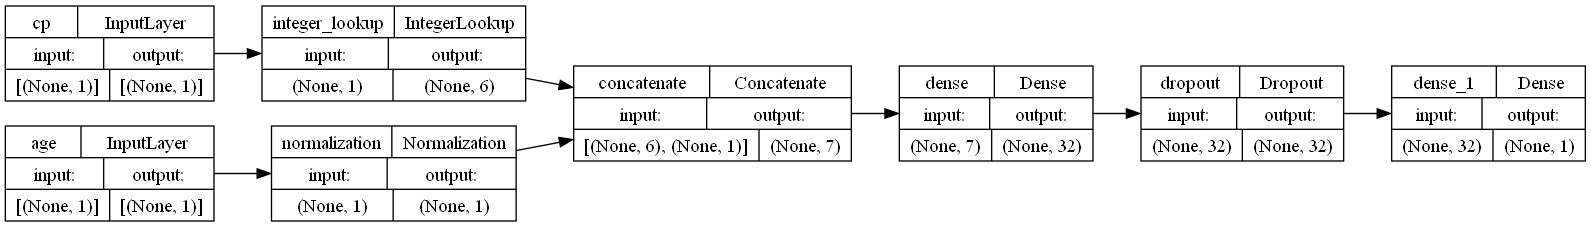

In [13]:
# Vstupn√≠ vrstva pro typ bolesti na hrudi
cp = keras.Input(shape=(1,), name="cp", dtype="int64")

# Vstupn√≠ vrstva pro vƒõk
age = keras.Input(shape=(1,), name="age")

all_inputs = [
    cp,
    age
]

# Zak√≥dov√°n√≠ typu bolesti
cp_encoded = encode_categorical_feature(cp, "cp", train_ds)

# Zak√≥dov√°n√≠ vƒõku
age_encoded = encode_numerical_feature(age, "age", train_ds)

# Spojen√≠ zak√≥dovan√Ωch vstup≈Ø
all_features = layers.concatenate(
    [
        cp_encoded,
        age_encoded
    ]
)

###################################################################################################
# TODO: nahraƒète spravne_jmeno_vrstvy spr√°vn√Ωm n√°zvem vrstvy

# Plnƒõ propojen√° vrstva s 32 neurony a aktivaƒçn√≠ funkc√≠ ReLU
x = spravne_jmeno_vrstvy(units=32, activation="relu")(all_features)

# Dropout vrstva s 0.5 pravdƒõpodobnost√≠ vypnut√≠ neuronu
x = spravne_jmeno_vrstvy(rate=0.5)(x)

# V√Ωstupn√≠ vrstva s jedn√≠m neuronem a aktivaƒçn√≠ funkc√≠ sigmoid
output = spravne_jmeno_vrstvy(units=1, activation="sigmoid")(x)
###################################################################################################


# Vytvo≈ôen√≠ modelu
model = keras.Model(all_inputs, output)

# Kompilace modelu (pou≈æit√≠ tr√©novac√≠ho algoritmu Adam a jako loss funkci pou≈æijeme binary_crossentropy)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

# in case of error: pydot.InvocationException: GraphViz's executables not found, we need to add the path to the graphviz executables to the PATH environment variable
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Zobraz√≠me si graf na≈°eho modelu
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")


* V p≈ôedchoz√≠m obr√°zku vid√≠me, ≈æe n√°≈° model "po≈æ√≠r√°" data cp a age pomoc√≠ vstupn√≠ch vrstev. 
* Na vstupn√≠ vrstvy navazuje zak√≥dov√°n√≠.
* Zak√≥dovan√° data vstupuj√≠ do plnƒõ propojen√© vrstvy.
* Dropout vrstva n√°m pom√°h√° zabr√°nit p≈ôeuƒçen√≠ - p≈ôi tr√©nov√°n√≠ n√°hodnƒõ vyp√≠n√° nƒõkter√© neurony.
* N√°sleduje v√Ωstupn√≠ vrstva, kter√° n√°m vrac√≠ v√Ωsledek.

#### Samotn√© tr√©nov√°n√≠ je v Kerasu velmi jednoduch√© :)

In [14]:
# poƒçet epoch - kolikr√°t se projde cel√Ω dataset
epochs = 60

##########################################################################################################
# TODO: Pus≈•te tr√©nov√°n√≠ modelu po zvolen√Ω poƒçet epoch na datasetu train_ds a validaci na datasetu val_ds. 
#       Hint: staƒç√≠ na to jeden ≈ô√°dek k√≥du s pou≈æit√≠m spr√°vn√© metody z modelu.

history = # tr√©nov√°n√≠ modelu
##########################################################################################################


Epoch 1/150


8/8 [==============================] - 1s 20ms/step - loss: 0.8383 - accuracy: 0.3223 - val_loss: 0.8315 - val_accuracy: 0.2787
Epoch 2/150
8/8 [==============================] - 0s 4ms/step - loss: 0.8133 - accuracy: 0.3554 - val_loss: 0.8088 - val_accuracy: 0.2787
Epoch 3/150
8/8 [==============================] - 0s 4ms/step - loss: 0.7832 - accuracy: 0.3347 - val_loss: 0.7893 - val_accuracy: 0.2787
Epoch 4/150
8/8 [==============================] - 0s 4ms/step - loss: 0.7721 - accuracy: 0.3636 - val_loss: 0.7711 - val_accuracy: 0.2787
Epoch 5/150
8/8 [==============================] - 0s 3ms/step - loss: 0.7660 - accuracy: 0.3843 - val_loss: 0.7547 - val_accuracy: 0.2623
Epoch 6/150
8/8 [==============================] - 0s 3ms/step - loss: 0.7410 - accuracy: 0.4339 - val_loss: 0.7403 - val_accuracy: 0.3279
Epoch 7/150
8/8 [==============================] - 0s 4ms/step - loss: 0.7336 - accuracy: 0.4587 - val_loss: 0.7275 - val_accuracy: 0.3279
Epoch 8/150
8/8 [=====================

### Teƒè m≈Ø≈æeme pou≈æ√≠t model na re√°ln√° data

In [15]:

# Tady si p≈ôiprav√≠me data, pro kter√© chceme zn√°t predikci. 
# Zkuste zmƒõnit hodnoty a sledovat, jak se mƒõn√≠ predikce. (Chest pain mus√≠ b√Ωt nƒõkter√° z kategori√≠, kter√© n√°≈° model zn√°.)
sample = {
    "age": 16,

    # Chest pain type
    "cp": pain_types.index("asymptomatic"), # one of 'unknown', 'typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'
}

# Vlo≈æ√≠me data do modelu a z√≠sk√°me predikci
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}

##########################################################################################################
# TODO: Posledn√≠ √∫kol - pou≈æijte model na predikci z dat, kter√° jste si p≈ôipravili v input_dict.

predictions = # predikce
##########################################################################################################

# Zobraz√≠me si, co model predikoval
print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)


1/1 [==============================] - 0s 99ms/step
This particular patient had a 8.4 percent probability of having a heart disease, as evaluated by our model.


### Jak vypad√° tento natr√©novan√Ω model?

Zkus√≠me do modelu nacpat spoustu dat a z v√Ωsledk≈Ø si vykresl√≠me graf.

In [16]:

# Nachyst√°me si rozsah mo≈æn√Ωch hodnot pro vƒõk a cp
grid_age = np.arange(0, 100, 1)
grid_cp = np.arange(0, 5, 1)

# pust√≠me p≈ôedikce pro v≈°echny kombinace vƒõk≈Ø a cp a sledujeme pr≈Øbƒõh predikce pomoc√≠ tqdm
possible_ages = []
possible_cps = []
predictions = []

# tqdm je knihovna, kter√° n√°m umo≈æn√≠ sledovat pr≈Øbƒõh v√Ωpoƒçtu (zobrazuje progress bar)
from tqdm import tqdm
for selected_age in tqdm(grid_age):
    for selected_cp in grid_cp:
        input_dict = {
            "age": tf.convert_to_tensor([selected_age]),
            "cp": tf.convert_to_tensor([selected_cp]),
        }
        prediction = model.predict(input_dict,verbose = 0)[0][0]

        # ulo≈æ√≠me si v√Ωsledky pro pozdƒõj≈°√≠ vykreslen√≠
        possible_ages.append(selected_age)
        possible_cps.append(selected_cp)
        predictions.append(prediction)




100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:22<00:00,  4.46it/s]


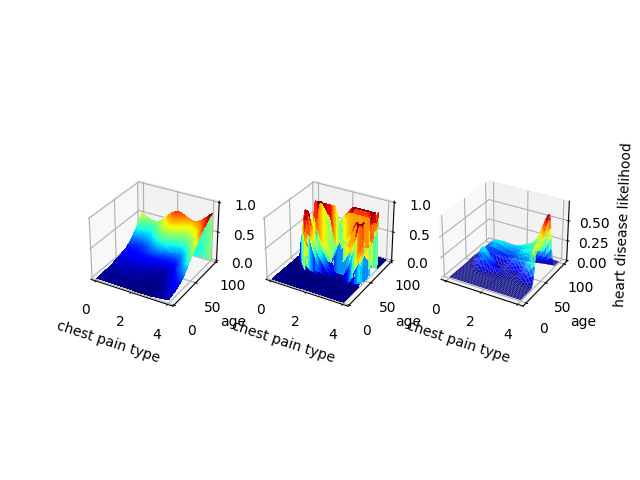

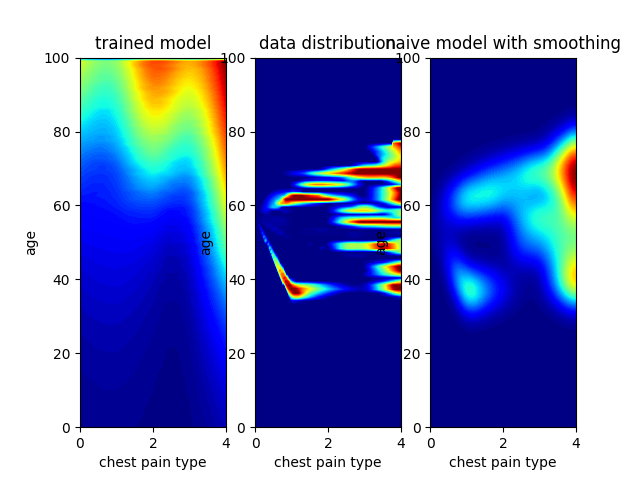

In [17]:
# N√°sleduj√≠c√≠ k√≥d je pouze pro vykreslen√≠ 3D graf≈Ø v≈°ech na≈°ich model≈Ø, nemus√≠te jej moc zkoumat...


from scipy.interpolate import griddata
import numpy as np

# p≈ôiprav√≠me si m≈ô√≠≈æku bod≈Ø pro vykreslen√≠
grid_x, grid_y = np.mgrid[0:4:100j, 0:100:100j]

# interpolujeme data
grid_z = griddata((possible_cps, possible_ages), predictions, (grid_x, grid_y), method='cubic', fill_value=0)

# o≈ô√≠zneme hodnoty mimo rozsah
grid_z = np.clip(grid_z, 0, 1)

fig = plt.figure()
ax = fig.add_subplot(131,projection='3d')

ax.plot_surface(grid_x, grid_y, grid_z,cmap=cmap,rstride=1, cstride=1, 
                       linewidth=0, antialiased=False, shade=False)

ax.set_xlabel('chest pain type')
ax.set_ylabel('age')

ax.set_zlim(0, 1)
ax.set_ylim(0, 100)

# add the previous 3d plot as a subplot in the figure
ax_naive = fig.add_subplot(132,projection='3d')


ax_naive.plot_surface(grid_x_naive, grid_y_naive, grid_z_naive,cmap=cmap,rstride=1, cstride=1, 
                       linewidth=0, antialiased=False, shade=False)

ax_naive.set_xlabel('chest pain type')
ax_naive.set_ylabel('age')

ax_naive.set_zlim(0, 1)
ax_naive.set_ylim(0, 100)

ax_naive_smooth = fig.add_subplot(133,projection='3d')

ax_naive_smooth.plot_surface(grid_x_naive, grid_y_naive, grid_z_naive_smooth, cmap=cmap)

ax_naive_smooth.set_xlabel('chest pain type')
ax_naive_smooth.set_ylabel('age')
ax_naive_smooth.set_zlabel('heart disease likelihood')


plt.show()

fig = plt.figure()

ax2d = fig.add_subplot(131)
ax2d.contourf(grid_x, grid_y, grid_z,colorbins, cmap=cmap)
ax2d.set_xlabel('chest pain type')
ax2d.set_ylabel('age')
ax2d.set_title('trained model')

ax2d.set_ylim(0, 100)

ax2d_naive = fig.add_subplot(132)
ax2d_naive.contourf(grid_x_naive, grid_y_naive, grid_z_naive, colorbins, cmap=cmap)
ax2d_naive.set_xlabel('chest pain type')
ax2d_naive.set_ylabel('age')
ax2d_naive.set_title('data distribution')

ax2d_naive.set_ylim(0, 100)

ax2d_naive_smooth = fig.add_subplot(133)
ax2d_naive_smooth.contourf(grid_x_naive, grid_y_naive, grid_z_naive_smooth, colorbins, cmap=cmap)
ax2d_naive_smooth.set_xlabel('chest pain type')
ax2d_naive_smooth.set_ylabel('age')
ax2d_naive_smooth.set_title('naive model with smoothing')

ax2d_naive_smooth.set_ylim(0, 100)


plt.show()

#### Jak dobr√Ω je n√°≈° ML model? 

Jak m≈Ø≈æe tr√©nov√°n√≠ dopadnout:
* P≈ôetr√©nov√°n√≠ (Overfitting): Model funguje dob≈ôe na tr√©novac√≠ch datech, ale ≈°patnƒõ na testovac√≠ch/validaƒçn√≠ch datech.
* Nedotr√©nov√°n√≠ (Underfitting): Model funguje ≈°patnƒõ na tr√©novac√≠ch datech i na testovac√≠ch/validaƒçn√≠ch datech.
* Dob≈ôe natr√©novan√Ω model (Good fit): Model funguje dob≈ôe na tr√©novac√≠ch datech i na testovac√≠ch/validaƒçn√≠ch datech.
* Pou≈æit√≠ nadp≈ôirozen√Ωch sil: Model funguje dob≈ôe na testovac√≠ch/validaƒçn√≠ch datech, ale ≈°patnƒõ na tr√©novac√≠ch datech. (Tohle se v praxi moc nest√°v√°.)

Typick√© probl√©my:
* ≈†patn√° vlidaƒçn√≠ data: Validaƒçn√≠ data nejsou reprezentativn√≠ pro testovac√≠ data nebo je validaƒçn√≠ch dat m√°lo.
* Nedostateƒçn√° vstupn√≠ data: vstupn√≠ data neobsahuj√≠ dostatek informac√≠ pro rozumn√© natr√©nov√°n√≠ modelu. (Nezachycuj√≠ v≈°echny relevantn√≠ vlastnosti.)
* ≈†patnƒõ vybalancovan√° data: Nƒõkter√© t≈ô√≠dy jsou v datech zastoupeny v√≠ce ne≈æ jin√©. (Nap≈ô. 90% pozitivn√≠ch p≈ô√≠klad≈Ø a 10% negativn√≠ch.)
* Mal√° tr√©novac√≠ sata/Model je p≈ô√≠li≈° velk√Ω: Tr√©novac√≠ data nejsou ≈°patnƒõ zvolen√°, ale je jich m√°lo na natr√©nov√°n√≠ takto velk√©ho modelu. (Overfitting)
* Model je p≈ô√≠li≈° mal√Ω: Model nem√° dostateƒçnou kapacitu na natr√©nov√°n√≠. (Underfitting)
* ≈°patn√° optimalizace: Model se netr√©noval dostateƒçnƒõ dlouho nebo se pou≈æila ≈°patn√° optimalizaƒçn√≠ metoda nebo parametry optimalizace. (Underfitting)


Pod√≠vejme se teƒè na historii tr√©nov√°n√≠ na≈°eho modelu. Dok√°≈æete odhadnout, jak n√°≈° model dopadl?


The model was trained with the following settings:
batch size: 32
epochs: 150
age: mean 54.6, std 9.0 (range 29-77)
traning data age: mean 54.7, std 8.9 (range 29-77)
validation data age: mean 54.1, std 9.3 (range 35-74)



chest pain categories distribution: [0 1 2 3 4], count: [  4  24  49  84 142], percentage: [0.01320132 0.07920792 0.16171617 0.27722772 0.46864686]
traning data chest pain categories distribution: [0 1 2 3 4], count: [  3  20  36  71 112], percentage: [0.01239669 0.08264463 0.14876033 0.29338843 0.46280992]
validation data chest pain categories distribution: [0 1 2 3 4], count: [ 1  4 13 13 30], percentage: [0.01639344 0.06557377 0.21311475 0.21311475 0.49180328]



heart disease distribution: [0 1], count: [220  83], percentage: [0.72607261 0.27392739]
traning data heart disease distribution: [0 1], count: [177  65], percentage: [0.73140496 0.26859504]
validation data heart disease distribution: [0 1], count: [43 18], percentage: [0.70491803 0.29508197]



traning 

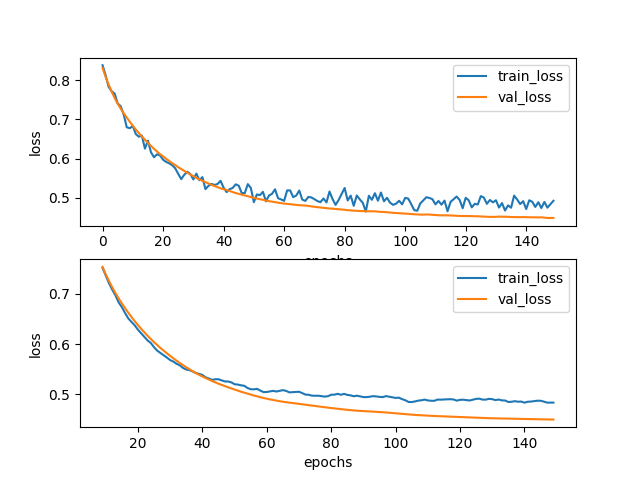

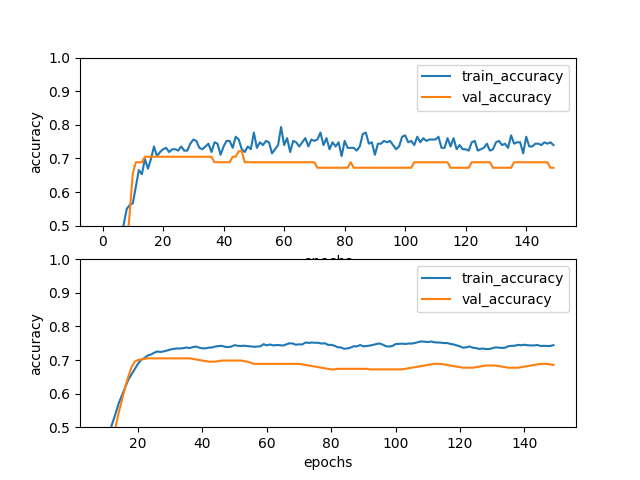

In [18]:
# P≈ôipomeneme si nastaven√≠ tr√©nov√°n√≠
print("The model was trained with the following settings:")
print("batch size: %d" % batch_size)
print("epochs: %d" % epochs)


# Vyp√≠≈°eme si pr≈Ømƒõrn√© hodnoty a rozptyly vƒõku v p≈Øvodn√≠m datasetu, tr√©novac√≠ch datech a validaƒçn√≠ch datech
print("age: mean %.1f, std %.1f (range %d-%d)" % (np.mean(ages_orig), np.std(ages_orig), np.min(ages_orig), np.max(ages_orig)))
print("traning data age: mean %.1f, std %.1f (range %d-%d)" % (np.mean(train_age_smol), np.std(train_age_smol), np.min(train_age_smol), np.max(train_age_smol)))
print("validation data age: mean %.1f, std %.1f (range %d-%d)" % (np.mean(val_age_smol), np.std(val_age_smol), np.min(val_age_smol), np.max(val_age_smol)))

print('\n\n') # oddƒõl√≠me v√Ωpis

# Vyp√≠≈°eme si rozlo≈æen√≠ kategori√≠ bolesti na hrudi v p≈Øvodn√≠m datasetu, tr√©novac√≠ch datech a validaƒçn√≠ch datech
print("chest pain categories distribution: %s, count: %s, percentage: %s" % (np.unique(cp_orig), np.unique(cp_orig, return_counts=True)[1], np.unique(cp_orig, return_counts=True)[1]/len(cp_orig)))
print("traning data chest pain categories distribution: %s, count: %s, percentage: %s" % (np.unique(train_cp_smol), np.unique(train_cp_smol, return_counts=True)[1], np.unique(train_cp_smol, return_counts=True)[1]/len(train_cp_smol)))
print("validation data chest pain categories distribution: %s, count: %s, percentage: %s" % (np.unique(val_cp_smol), np.unique(val_cp_smol, return_counts=True)[1], np.unique(val_cp_smol, return_counts=True)[1]/len(val_cp_smol)))

print('\n\n') # oddƒõl√≠me v√Ωpis

# Vyp√≠≈°eme si rozlo≈æen√≠ dat pro p≈ô√≠tomnost nebo nep≈ô√≠tomnost onemocnƒõn√≠ v p≈Øvodn√≠m datasetu, tr√©novac√≠ch datech a validaƒçn√≠ch datech
print("heart disease distribution: %s, count: %s, percentage: %s" % (np.unique(labels_orig), np.unique(labels_orig, return_counts=True)[1], np.unique(labels_orig, return_counts=True)[1]/len(labels_orig)))
print("traning data heart disease distribution: %s, count: %s, percentage: %s" % (np.unique(train_labels_smol), np.unique(train_labels_smol, return_counts=True)[1], np.unique(train_labels_smol, return_counts=True)[1]/len(train_labels_smol)))
print("validation data heart disease distribution: %s, count: %s, percentage: %s" % (np.unique(val_labels_smol), np.unique(val_labels_smol, return_counts=True)[1], np.unique(val_labels_smol, return_counts=True)[1]/len(val_labels_smol)))

print('\n\n') # oddƒõl√≠me v√Ωpis

# Vyp√≠≈°eme velikost tr√©novac√≠ a validaƒçn√≠ mno≈æiny
print("traning data size: %d" % len(train_labels_smol))
print("validation data size: %d" % len(val_labels_smol))

print('\n\n') # oddƒõl√≠me v√Ωpis

# Spoƒç√≠t√°me si accuracy na validaƒçn√≠ mno≈æinƒõ
predictions = []
for i in range(len(val_cp_smol.values)):
    input_dict = {
            "age": tf.convert_to_tensor([val_age_smol.values[i]]),
            "cp": tf.convert_to_tensor([val_cp_smol.values[i]]),
        }
    predictions.append(model.predict(input_dict,verbose = 0)[0][0])

best_accuracy_trained, best_threshold_trained = evaluate_predictions(val_labels_smol.values, predictions)

# Porovn√°me natr√©novan√Ω model s p≈Øvodn√≠m naivn√≠m modelem
print("Naive model best accuracy: {:.2f}% at threshold {:.2f}".format(best_accuracy * 100, best_threshold))
print("Trained model accuracy: {:.2f}% at threshold {:.2f}".format(best_accuracy_trained * 100, best_threshold_trained))

# zobraz√≠me graf v√Ωvoje loss a accuracy v pr≈Øbƒõhu tr√©nov√°n√≠
import pandas as pd
frame = pd.DataFrame(history.history)
frame.head()

# plot the loss and smoothed loss as two subplots
plt.figure()
plt.subplot(211)
plt.plot(frame[['loss', 'val_loss']])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(212)
plt.plot(frame[['loss', 'val_loss']].rolling(10).mean())
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()


# plot the accuracy and smoothed accuracy as two subplots
plt.figure()
plt.subplot(211)
plt.plot(frame[['accuracy', 'val_accuracy']])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.ylim(0.5, 1)

plt.subplot(212)
plt.plot(frame[['accuracy', 'val_accuracy']].rolling(10).mean())
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.ylim(0.5, 1)
plt.show()



#### Z√°vƒõr

- Loss kles√° - model se uƒç√≠ z tr√©novac√≠ch dat.
- Rozch√°z√≠ se validaƒçn√≠ a tr√©novac√≠ loss - model se p≈ôeuƒçuje.
- Model dosahuje p≈ôesnosti ~74%. To znamen√°, ≈æe v 74% p≈ô√≠pad≈Ø je schopen spr√°vnƒõ urƒçit, zda pacient trp√≠ nebo netrp√≠ nemoc√≠ srdce. Pokud by mƒõl model p≈ôesnost 50 %, znamenalo by to, ≈æe je model naprosto n√°hodn√Ω a v√Ωsledky jsou stejn√© jako hod minc√≠.
- Pravdƒõdopobn√© je, ≈æe pouh√© 2 atributy nestaƒç√≠ k tomu, aby bylo mo≈æn√© p≈ôesnƒõ urƒçit, zda pacient trp√≠ nebo netrp√≠ nemoc√≠ srdce. Je t≈ôeba pou≈æ√≠t v√≠ce atribut≈Ø.
